In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

print('Esperamos trabalhar no diretório')
print(os.getcwd())



Esperamos trabalhar no diretório
c:\Users\bebec\OneDrive\Área de Trabalho\INSPER\CDADOS\CD22-2\Projeto2\22-2a-cd-p2-grupo_bexcamrefe


INTRODUÇÃO
Explicar objetivo do trabalho
Apresentar banco de dados
Definição de Target e Feature

Prever: A probabilidade de um voo americano em Janeiro vai ser cancelado.
Pergunta: Qual a probabilidade do meu voo ser cancelado de acordo com a sua cia aéra?

MINERAÇÃO DE DADOS
Limpeza do dataset

In [3]:
dados_2019 = pd.read_csv('Jan_2019_ontime.csv')
# manter: OP_CARRIER, ORIGIN, DESTINATION, CANCELLED, DIVERTED, DISTANCE
dados_2019.head(5)

Novos_dados_2019 = dados_2019.loc[:,['OP_CARRIER','ORIGIN', 'DEST','ARR_DEL15','CANCELLED','DISTANCE']]
Novos_dados_2019["Ano"]="2019"
Novos_dados_2019.head()

,OP_CARRIER,ORIGIN,DEST,ARR_DEL15,CANCELLED,DISTANCE,Ano
0,9E,GNV,ATL,0.0,0.0,300.0,2019
1,9E,MSP,CVG,0.0,0.0,596.0,2019
2,9E,DTW,CVG,0.0,0.0,229.0,2019
3,9E,TLH,ATL,0.0,0.0,223.0,2019
4,9E,ATL,FSM,0.0,0.0,579.0,2019


In [4]:
dados_2020 = pd.read_csv('Jan_2020_ontime.csv')
# manter: OP_CARRIER, ORIGIN, DESTINATION, CANCELLED, DIVERTED, DISTANCE
dados_2020.head(5)

Novos_dados_2020 = dados_2020.loc[:,['OP_CARRIER','ORIGIN', 'DEST','ARR_DEL15','CANCELLED','DISTANCE']]
Novos_dados_2020["Ano"]="2020"
Novos_dados_2020.head()

,OP_CARRIER,ORIGIN,DEST,ARR_DEL15,CANCELLED,DISTANCE,Ano
0,EV,ORD,GRB,0.0,0.0,174.0,2020
1,EV,TUL,ORD,0.0,0.0,585.0,2020
2,EV,EWR,TYS,0.0,0.0,631.0,2020
3,EV,BTR,IAH,0.0,0.0,253.0,2020
4,EV,RIC,IAH,0.0,0.0,1157.0,2020


In [5]:
Dados_gerais = pd.merge(Novos_dados_2020 , Novos_dados_2019, how = 'outer') 

Treinamento = Dados_gerais.sample(frac = 0.7)

Teste = Dados_gerais.drop(Treinamento.index)

Treinamento['OP_CARRIER'] = Treinamento['OP_CARRIER'].astype('category')


In [6]:
Comparador = pd.read_csv('Pasta1.csv')
print(Comparador)

   OP_CARRIER                Airline Name
0          Dl             Delta Air Lines
1          AA     American Airlines Cargo
2          WN          Southwest Airlines
3          OO            SkyWest Airlines
4          UA       United Airlines Cargo
5          YX            Midwest Airlines
6          MQ                   Envoy air
7          B6                     JetBlue
8          9E                    Endeavor
9          AS             Alaska Airlines
10         YV               Mesa Airlines
11         NK             Spirit Airlines
12         EV  Atlatic Southeast Airlines
13         F9             FRONTIER FLIGHT
14         G4               Allegiant Air
15         HA           Hawaiian Airlines
16         OH     Comair Delta Connection


In [7]:
Treinamento['OP_CARRIER'].cat.categories = [' Endeavor','American Airlines Cargo','Alaska Airlines','JetBlue','Delta Air Lines','Atlatic Southeast Airlines','Frontier Flight','Allegiant Air','Hawaiian Airlines','Envoy Air','Spirit Airlines','Comair Delta Connection','SkyWest Airlines','United Airlines Cargo','Southwest Airlines','Mesa Airlines','Midwest Airlines']

In [8]:
Treinamento.head(5)

,OP_CARRIER,ORIGIN,DEST,ARR_DEL15,CANCELLED,DISTANCE,Ano
1170377,SkyWest Airlines,OMA,DEN,0.0,0.0,472.0,2019
352401,SkyWest Airlines,ORD,MKE,0.0,0.0,67.0,2020
1141010,Midwest Airlines,MIA,PIT,1.0,0.0,1013.0,2019
715363,Spirit Airlines,FLL,EWR,0.0,0.0,1065.0,2019
520524,SkyWest Airlines,ORD,CMX,0.0,0.0,360.0,2020


In [9]:
Cancelados = Treinamento['CANCELLED'] == 1
Voo_cancelados = Treinamento.loc[Cancelados,:]
print(len(Voo_cancelados))
Voo_cancelados.isnull().sum()


16608


OP_CARRIER        0
ORIGIN            0
DEST              0
ARR_DEL15     16608
CANCELLED         0
DISTANCE          0
Ano               0
dtype: int64

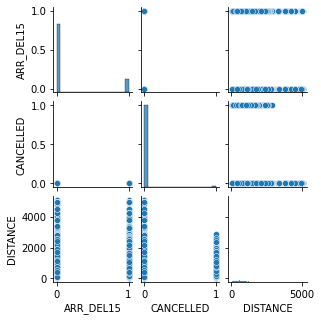

In [10]:
# REGRESSÃO MULTIPLA DE TESTE
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
import seaborn as sns


sns.pairplot(Treinamento, height=1.5); # Cruza todas as variáveis entre sí, dá maneira que elas precisam sendo quantitativas
#Treinamento.columns



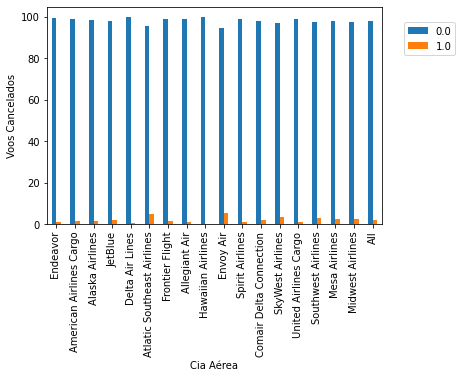

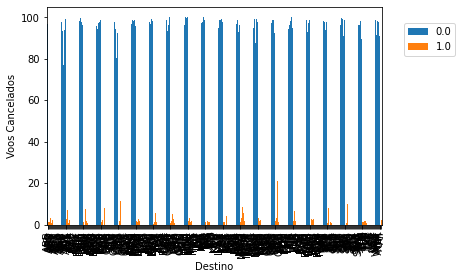

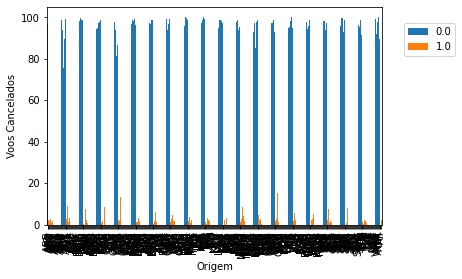

In [14]:
# CRUZAMENTO DE QUALITATIVAS CM QUALITATIVAS
# Cia X Cancelados
cia_canc = pd.crosstab(Treinamento['OP_CARRIER'], Treinamento['CANCELLED'], normalize='index',margins=True).round(3)*100
cia_canc.plot.bar()
plt.ylabel('Voos Cancelados')
plt.xlabel('Cia Aérea')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

# Destino X Cancelados
dest_canc = pd.crosstab(Treinamento['DEST'], Treinamento['CANCELLED'], normalize='index',margins=True).round(3)*100
dest_canc.plot.bar()
plt.ylabel('Voos Cancelados')
plt.xlabel('Destino')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

# Origem X Cancelados
org_canc = pd.crosstab(Treinamento['ORIGIN'], Treinamento['CANCELLED'], normalize='index',margins=True).round(3)*100
org_canc.plot.bar()
plt.ylabel('Voos Cancelados')
plt.xlabel('Origem')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()


In [17]:
Treinamento.corr()


,ARR_DEL15,CANCELLED,DISTANCE
ARR_DEL15,1.00000,NaN,0.006990
CANCELLED,NaN,1.000000,-0.040538
DISTANCE,0.00699,-0.040538,1.000000


MODELO DE PREDIÇÃO - RESULTADOS

VALIDAÇÃO DOS RESULTADOS

In [12]:
# código de validação de resultados 